In [1]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 973 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 10.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/tansa05/jupyter/bin/python -m pip install --upgrade pip' command.


In [69]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 7.3 MB/s eta 0:00:011
     |████████████████████████████████| 96 kB 18.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/tansa05/jupyter/bin/python -m pip install --upgrade pip' command.


In [90]:
# Step 1

from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model['dog']

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [273]:
# Step 3 - Read human pairs and similarities

word_pairs_similarity = {}
with open('table1_pairs.txt', 'r') as ft:
    lines = ft.readlines()
    for line in lines:
        w1, w2, score = line.split()
        word_pairs_similarity[(w1.lower(), w2.lower())] = float(score)


In [280]:
# Step 3 - Pearson Correlation with word2vec

pearson_correlation, _, x = model.evaluate_word_pairs('table1_pairs.txt', delimiter=' ')
print(pearson_correlation, x)

(0.7533889716758513, 4.457925401443882e-13) 0.0


In [297]:
# Step 3 - Pearson Correlation with LSA

pearson_correlation_lsa, _, x = lsa_model.evaluate_word_pairs('table1_pairs.txt', delimiter=' ')
print(pearson_correlation_lsa, x)

(0.33119615336345803, 0.007041097897088098) 0.0


In [9]:
# Step 4 - Semantic Accuracy


total = 0
counter = 0
for k,v in sem.items():
    total += 1
    try:
        result = model.most_similar(negative=[k[0]], positive=[v[0], k[1]])
    except KeyError as e:
        print(e)
        continue
    if result[0][0] == v[1]:
        counter += 1

k[0]  athens  k[1]  baghdad  v[0]  greece  v[1]  iraq
k[0]  athens  k[1]  bangkok  v[0]  greece  v[1]  thailand
k[0]  athens  k[1]  beijing  v[0]  greece  v[1]  china
k[0]  athens  k[1]  berlin  v[0]  greece  v[1]  germany
k[0]  athens  k[1]  bern  v[0]  greece  v[1]  switzerland
"Key 'bern' not present in vocabulary"
k[0]  athens  k[1]  cairo  v[0]  greece  v[1]  egypt
k[0]  athens  k[1]  canberra  v[0]  greece  v[1]  australia
k[0]  athens  k[1]  hanoi  v[0]  greece  v[1]  vietnam
"Key 'hanoi' not present in vocabulary"
k[0]  athens  k[1]  havana  v[0]  greece  v[1]  cuba
k[0]  athens  k[1]  helsinki  v[0]  greece  v[1]  finland
k[0]  athens  k[1]  islamabad  v[0]  greece  v[1]  pakistan
k[0]  athens  k[1]  kabul  v[0]  greece  v[1]  afghanistan
k[0]  athens  k[1]  london  v[0]  greece  v[1]  england
k[0]  athens  k[1]  madrid  v[0]  greece  v[1]  spain
k[0]  athens  k[1]  moscow  v[0]  greece  v[1]  russia
k[0]  athens  k[1]  oslo  v[0]  greece  v[1]  norway
"Key 'oslo' not present 

In [10]:
print(counter/total)

0.10093544289178889


In [266]:
# Step 4 - Word2Vec Accuracy

analogy_scores = model.evaluate_word_analogies('words_test_small.txt')
analogy_scores

(0.7007874015748031,
 [{'section': 'capital-common-countries',
   'correct': [('BERLIN', 'GERMANY', 'PARIS', 'FRANCE'),
    ('BERLIN', 'GERMANY', 'MOSCOW', 'RUSSIA'),
    ('BERLIN', 'GERMANY', 'ROME', 'ITALY'),
    ('LONDON', 'ENGLAND', 'MOSCOW', 'RUSSIA'),
    ('LONDON', 'ENGLAND', 'PARIS', 'FRANCE'),
    ('LONDON', 'ENGLAND', 'ROME', 'ITALY'),
    ('LONDON', 'ENGLAND', 'BERLIN', 'GERMANY'),
    ('MOSCOW', 'RUSSIA', 'PARIS', 'FRANCE'),
    ('MOSCOW', 'RUSSIA', 'ROME', 'ITALY'),
    ('MOSCOW', 'RUSSIA', 'BERLIN', 'GERMANY'),
    ('PARIS', 'FRANCE', 'ROME', 'ITALY'),
    ('PARIS', 'FRANCE', 'BERLIN', 'GERMANY'),
    ('PARIS', 'FRANCE', 'MOSCOW', 'RUSSIA'),
    ('ROME', 'ITALY', 'BERLIN', 'GERMANY'),
    ('ROME', 'ITALY', 'MOSCOW', 'RUSSIA'),
    ('ROME', 'ITALY', 'PARIS', 'FRANCE')],
   'incorrect': [('BERLIN', 'GERMANY', 'LONDON', 'ENGLAND'),
    ('MOSCOW', 'RUSSIA', 'LONDON', 'ENGLAND'),
    ('PARIS', 'FRANCE', 'LONDON', 'ENGLAND'),
    ('ROME', 'ITALY', 'LONDON', 'ENGLAND')]},
  {'se

In [268]:
# Step 4 - word2vec accuracy scores

accuracy_scores = {}

for sections in analogy_scores[1]:
    correct = len(sections['correct'])
    wrong = len(sections['incorrect'])
    try:
        accuracy_scores[sections['section']] = correct/(correct + wrong)
    except ZeroDivisionError:
        accuracy_scores[sections['section']] = np.inf
    
print(accuracy_scores)


{'capital-common-countries': 0.8, 'capital-world': 1.0, 'currency': inf, 'city-in-state': 0.8305084745762712, 'family': 0.9222222222222223, 'gram1-adjective-to-adverb': 0.28157894736842104, 'gram2-opposite': 0.2, 'gram3-comparative': 0.8088235294117647, 'gram4-superlative': 0.9285714285714286, 'gram5-present-participle': 0.7867647058823529, 'gram6-nationality-adjective': 0.8850574712643678, 'gram7-past-tense': 0.7216666666666667, 'gram8-plural': 0.8137254901960784, 'gram9-plural-verbs': 0.7954545454545454, 'Total accuracy': 0.7007874015748031}


In [3]:
# Step 4 - LSA word vectors
# import pickle
# from collections import Counter
# from sklearn.feature_extraction.text import TfidfVectorizer

# word_list = []
# words_freq = []
# with open('lsa_text.txt', 'r') as fp:
#     word_list = [line.rstrip() for line in fp]

# with open('words_freq.pickle', 'rb') as fb:
#     words_freq = pickle.load(fb)
    
# with open('bigram_freq.pickle', 'rb') as f:
#     bigrams_freq = pickle.load(f)
    
# with open('correlation_matrix.pickle', 'rb') as fc:
#     correlation_matrix = pickle.load(fc)
    
# len(bigrams_freq)
# vectorizer = TfidfVectorizer(smooth_idf=True)
# X = vectorizer.fit_transform(word_list)

425431

In [69]:
# Basic Exercise Step 1

import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Error loading brown: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


False

In [70]:
# Basic Exercise Step 2

all_text = brown.words()
all_text = [w.lower() for w in all_text if w.isalpha()]
fdist = nltk.FreqDist(w.lower() for w in all_text)#.most_common(5000)
fdist

FreqDist({'the': 69971, 'of': 36412, 'and': 28853, 'to': 26158, 'a': 23195, 'in': 21337, 'that': 10594, 'is': 10109, 'was': 9815, 'he': 9548, ...})

In [71]:
# Basic Exercise Step 2

fiveK_words = fdist.most_common(5000)
print("Most frequent: ", fiveK_words[:5])
print("Least frequent: ", fiveK_words[-5:])

Most frequent:  [('the', 69971), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195)]
Least frequent:  [('vertex', 19), ('rourke', 19), ('killpath', 19), ('haney', 19), ('letch', 19)]


In [283]:
# Construct word list

import numpy as np
import pandas as pd

fiveK_w = []
for entry in fiveK_words:
    fiveK_w.append(entry[0])
    
table_words = ['cord', 'smile', 'hill', 'woodland', 'rooster', 'voyage', 'car', 'journey', 'noon',
         'string', 'cemetery', 'mound', 'fruit', 'furnace', 'glass', 'jewel', 'autograph', 'shore',
         'magician', 'oracle', 'automobile', 'wizard', 'crane', 'implement', 'mound', 'stove',
         'brother', 'lad', 'grin', 'implement', 'sage', 'wizard', 'asylum', 'fruit', 'oracle',
         'bird', 'sage', 'asylum', 'monk', 'graveyard', 'crane', 'madhouse', 'bird', 'cock', 'glass',
         'magician', 'rooster', 'brother', 'monk', 'food', 'fruit', 'cushion', 'jewel', 'asylum',
         'madhouse', 'monk', 'slave', 'cemetery', 'magician', 'wizard', 'furnace', 'stove', 'asylum',
         'coast', 'forest', 'hill', 'mound', 'grin', 'lad', 'cord', 'string', 'shore', 'woodland',
         'glass', 'tumbler', 'monk', 'oracle', 'grin', 'smile', 'boy', 'sage', 'serf', 'slave',
         'automobile', 'cushion', 'journey', 'voyage', 'mound', 'shore', 'autograph', 'signature',
         'lad', 'wizard', 'coast', 'shore', 'forest', 'graveyard', 'forest', 'woodland', 'food',
         'rooster', 'implement', 'tool', 'cemetery', 'woodland', 'cock', 'rooster', 'shore', 'voyage',
         'boy', 'Ind', 'bird', 'woodland', 'cushion', 'coast', 'hill', 'cemetery', 'furnace',
         'implement', 'automobile', 'crane', 'rooster', 'midday', 'nооn', 'gem', 'jewel', 'boy',
         'pillow', 'graveyard', 'car']

for word in table_words:
    if word not in fiveK_w:
        fiveK_w.append(word)

In [284]:
# Basic Exercise Step 3 -> Construct Bigram frequencies

from collections import Counter
from nltk.util import ngrams

bigrams = ngrams(all_text, 2)
bigrams_freq = Counter(bigrams)
print(len(bigrams_freq))
bigrams_mc = bigrams_freq.most_common()

425431


In [285]:
df = pd.DataFrame(0.0, index=fiveK_w, columns=fiveK_w)

for entry in bigrams_mc:
  # print(entry[0][0], entry[1])
  # break
    if entry[0][0] not in fiveK_w or entry[0][1] not in fiveK_w:
#         bigrams_freq.pop(tuple((entry[0][0], entry[0][1])))
        continue
    else:
        df[entry[0][0]][entry[0][1]] = entry[1]
        
df

,the,of,and,to,a,in,that,is,was,he,...,cock,cushion,tumbler,serf,signature,Ind,midday,nооn,gem,pillow
the,36.0,9774.0,2307.0,3525.0,18.0,6156.0,1407.0,810.0,549.0,12.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
of,65.0,10.0,134.0,10.0,27.0,12.0,169.0,62.0,29.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
and,68.0,80.0,38.0,42.0,27.0,158.0,25.0,25.0,41.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
to,16.0,35.0,314.0,8.0,10.0,44.0,30.0,278.0,206.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,12.0,1502.0,639.0,682.0,5.0,1432.0,219.0,875.0,790.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
midday,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nооn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gem,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
# df = df.astype(float)
df.dtypes

the       float64
of        float64
and       float64
to        float64
a         float64
           ...   
Ind       float64
midday    float64
nооn      float64
gem       float64
pillow    float64
Length: 5032, dtype: object

In [287]:
import math

def get_ppmi(bigram, sum_bg, sum_ug):
    co_occurence = (bigrams_freq.get(bigram)/sum_bg)
#     print("co_occurence: ", co_occurence)
    p_w1 = (fdist.get(bigram[0])/sum_ug)
#     print("p_w1: ", p_w1)
    p_w2 = (fdist.get(bigram[1])/sum_ug)
#     print("p_w2: ", p_w2)
    
#     print(math.log(co_occurence/(p_w1*p_w2)))
    ppmi = math.log(co_occurence/(p_w1*p_w2), 2)
#     print(ppmi)
    return max(ppmi,0)
    

In [288]:
sum_bigrams = sum(bigrams_freq.values())
print(sum_bigrams)
sum_unigrams = sum(fdist.values())
print(sum_unigrams)
ppmi_matrix = pd.DataFrame(0.0, columns=df.columns, index=df.index)
for bg in bigrams_freq:
#     print(bg)
    if bg[0] not in fiveK_w or bg[1] not in fiveK_w:
        continue
        
    else:
        ppmi = get_ppmi(bg, sum_bigrams, sum_unigrams)
        ppmi_matrix.loc[bg[0], bg[1]] = ppmi
ppmi_matrix

981715
981716


,the,of,and,to,a,in,that,is,was,he,...,cock,cushion,tumbler,serf,signature,Ind,midday,nооn,gem,pillow
the,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,1.810478,0.000000,0.0,1.225516,0.0,1.488550,0.0,0.000000,3.132406
of,1.913085,0.000000,0.0,0.0,0.803964,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.430893,0.0,0.000000,0.000000
and,0.165847,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.608998,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
to,0.918921,0.000000,0.0,0.0,0.142085,0.0,0.0,0.0,0.0,0.000000,...,0.000000,3.229983,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
a,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,3.081493,3.403421,4.403421,0.0,2.818459,0.0,0.000000,0.0,3.403421,2.403421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
midday,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
nооn,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
gem,0.000000,3.752821,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [289]:
# ppmi_matrix = ppmi_matrix.astype('float')

# ppmi_matrix.fillna(0)
# ppmi_matrix.dtypes
ppmi_matrix.astype(bool).sum(axis=1)

the       2713
of        1841
and       2358
to        1148
a         1907
          ... 
Ind          0
midday       4
nооn         0
gem          3
pillow       5
Length: 5032, dtype: int64

In [290]:
from sklearn.decomposition import PCA


pca = PCA(n_components=300)
result = pca.fit_transform(ppmi_matrix)

In [209]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.0134317  0.00961524 0.0057617  0.0048972  0.00431968 0.00393977
 0.00385235 0.00362008 0.00325892 0.00299352 0.00275112 0.00266446
 0.00249797 0.00222691 0.00207436 0.00203692 0.00202077 0.00201837
 0.00190751 0.00185287 0.00182554 0.00175143 0.00171718 0.00170935
 0.00166665 0.00164648 0.00162294 0.00159608 0.00157105 0.00156005
 0.0015437  0.00152934 0.00151429 0.00150739 0.00150334 0.00148286
 0.00147132 0.00146873 0.00145301 0.00144347 0.00142889 0.00142361
 0.0014096  0.00140704 0.00139974 0.00139343 0.0013867  0.00137766
 0.00137493 0.0013641  0.00136242 0.00135924 0.00135407 0.00134828
 0.00133846 0.00133259 0.00132789 0.00131393 0.00131125 0.00130227
 0.00129469 0.00129031 0.00128568 0.00128192 0.00127383 0.00127276
 0.00126802 0.00126615 0.00125792 0.00125565 0.00124794 0.00124207
 0.00124032 0.00123361 0.00122843 0.00122244 0.00122121 0.00121649
 0.00121215 0.00121093 0.00120467 0.0012017  0.0012001  0.00119544
 0.00119149 0.0011868  0.00117989 0.00117887 0.00117298 0.0011

In [291]:
# temp = list(fdist.keys())
fiveK_w_index = {}
for i in range(0, len(fiveK_w)):
    fiveK_w_index[fiveK_w[i]] = i
    
fiveK_w_index

{'the': 0,
 'of': 1,
 'and': 2,
 'to': 3,
 'a': 4,
 'in': 5,
 'that': 6,
 'is': 7,
 'was': 8,
 'he': 9,
 'for': 10,
 'it': 11,
 'with': 12,
 'as': 13,
 'his': 14,
 'on': 15,
 'be': 16,
 'at': 17,
 'by': 18,
 'i': 19,
 'this': 20,
 'had': 21,
 'not': 22,
 'are': 23,
 'but': 24,
 'from': 25,
 'or': 26,
 'have': 27,
 'an': 28,
 'they': 29,
 'which': 30,
 'one': 31,
 'you': 32,
 'were': 33,
 'her': 34,
 'all': 35,
 'she': 36,
 'there': 37,
 'would': 38,
 'their': 39,
 'we': 40,
 'him': 41,
 'been': 42,
 'has': 43,
 'when': 44,
 'who': 45,
 'will': 46,
 'more': 47,
 'if': 48,
 'no': 49,
 'out': 50,
 'so': 51,
 'said': 52,
 'what': 53,
 'up': 54,
 'its': 55,
 'about': 56,
 'into': 57,
 'than': 58,
 'them': 59,
 'can': 60,
 'only': 61,
 'other': 62,
 'new': 63,
 'some': 64,
 'could': 65,
 'time': 66,
 'these': 67,
 'two': 68,
 'may': 69,
 'then': 70,
 'do': 71,
 'first': 72,
 'any': 73,
 'my': 74,
 'now': 75,
 'such': 76,
 'like': 77,
 'our': 78,
 'over': 79,
 'man': 80,
 'me': 81,
 'even': 8

In [292]:
print(result.shape)
M2_10 = result[:,10]
M2_100 = result[:,100]
M2_300 = result[:,:]

(5032, 300)


In [293]:
lsa_model = KeyedVectors(300)
lsa_model.add_vectors(fiveK_w, M2_300)

lsa_analogy_scores, lsa_scores_by_section = lsa_model.evaluate_word_analogies('word-test.v1.txt')


In [294]:
# Step 4 - lsa accuracy scores

lsa_accuracy_scores = {}

for sections in lsa_scores_by_section:
    correct = len(sections['correct'])
    wrong = len(sections['incorrect'])
    try:
        lsa_accuracy_scores[sections['section']] = correct/(correct + wrong)
    except ZeroDivisionError:
        lsa_accuracy_scores[sections['section']] = np.inf
    
print(lsa_accuracy_scores)

{'capital-common-countries': 0.05, 'capital-world': 0.16666666666666666, 'currency': inf, 'city-in-state': 0.01694915254237288, 'family': 0.18888888888888888, 'gram1-adjective-to-adverb': 0.007894736842105263, 'gram2-opposite': 0.0, 'gram3-comparative': 0.18382352941176472, 'gram4-superlative': 0.11904761904761904, 'gram5-present-participle': 0.09558823529411764, 'gram6-nationality-adjective': 0.011494252873563218, 'gram7-past-tense': 0.135, 'gram8-plural': 0.0032679738562091504, 'gram9-plural-verbs': 0.045454545454545456, 'Total accuracy': 0.08442694663167104}


In [296]:
# Create small test set

file_text = ''

with open('words_test_small.txt', 'w') as f_small:
    for section in lsa_scores_by_section:
        section_name = section['section']
        if section_name == 'Total accuracy':
            continue
        else:
            f_small.write(': ' + section_name + '\n')
            for correct in section['correct']:
                f_small.write(' '.join(correct) + '\n')
            for incorrect in section['incorrect']:
                f_small.write(' '.join(incorrect) + '\n')

In [275]:
#Q2 Step 1

with open('embeddings/data.pkl', 'rb') as we:
    data = pickle.load(we)

In [30]:
!pip install torch torchvision
!pip install tensorflow
# for word_vector in data['E']:

You should consider upgrading via the '/Users/tansa05/jupyter/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 241.2 MB 22 kB/s s eta 0:00:01
     |████████████████████████████████| 1.6 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 5.9 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 980 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 438 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 3.2 MB 25.3 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 6.3 MB/s eta 0:

In [255]:
# UNCOMMENT THIS BLOCK TO RUN SHUFFLED CORPUS CODE

# Shuffle the corpus to remove any "real semantic change"

# import random
# # print(len(data['E'][0]))

# for word_vector in range(0, len(data['E'])):
#     random.shuffle(data['E'][word_vector])   


In [276]:
# Linear transformation for word embedding alignment

import torch
import tensorflow as tf
import numpy as np

list_tensor = []

for word_vector in range(0, len(data['E'][0])):
    t_wv = torch.FloatTensor(np.array(data['E'][0][word_vector]))
    list_tensor.append(t_wv)

print(len(list_tensor))
print(list_tensor[0].size(0), list_tensor[1].size(0))

10
300 300


In [277]:
# Linear transformation for word embedding alignment

from torch.autograd import Variable

def train_model(input_list):
    
    criterion = torch.nn.MSELoss() 
    optimizer = torch.optim.SGD(model_1.parameters(), lr=learningRate)
    
    inputs = Variable(torch.from_numpy(np.array(input_list[0])))
    labels = Variable(torch.from_numpy(np.array(input_list[1])))
    
    for epoch in range(epochs):

        optimizer.zero_grad()
        outputs = model_1(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        

In [278]:
# Method 1
# Linear transformation for word embedding alignment

learningRate = 0.01 
epochs = 100
model_1 = torch.nn.Linear(list_tensor[0].size(0), list_tensor[1].size(0))


train_model(list_tensor)

epoch 0, loss 0.0053369649685919285
epoch 1, loss 0.005335541442036629
epoch 2, loss 0.005334118381142616
epoch 3, loss 0.005332696717232466
epoch 4, loss 0.005331274121999741
epoch 5, loss 0.005329853389412165
epoch 6, loss 0.005328431725502014
epoch 7, loss 0.005327010992914438
epoch 8, loss 0.005325590260326862
epoch 9, loss 0.005324170459061861
epoch 10, loss 0.005322750192135572
epoch 11, loss 0.005321331787854433
epoch 12, loss 0.005319912452250719
epoch 13, loss 0.00531849404796958
epoch 14, loss 0.00531707564368844
epoch 15, loss 0.0053156581707298756
epoch 16, loss 0.005314240697771311
epoch 17, loss 0.005312823224812746
epoch 18, loss 0.005311407148838043
epoch 19, loss 0.005309990141540766
epoch 20, loss 0.0053085749968886375
epoch 21, loss 0.005307158920913935
epoch 22, loss 0.005305744241923094
epoch 23, loss 0.005304329097270966
epoch 24, loss 0.005302914883941412
epoch 25, loss 0.005301501136273146
epoch 26, loss 0.005300086922943592
epoch 27, loss 0.005298673640936613
e

In [279]:
# Method 1

cosine_wv = []
cosine_dist = torch.nn.CosineSimilarity(dim=0)
for word in range(0, len(data['E'])):
    temp_wv = []
    ref_wv = torch.FloatTensor(np.array(data['E'][word][0]))
    for word_vector in range(1, len(data['E'][word])):
        rotated_wv = model_1(torch.FloatTensor(np.array(data['E'][word][word_vector])))
        cosine = cosine_dist(ref_wv, rotated_wv)
        temp_wv.append(1 - cosine)
        
    cosine_wv.append(temp_wv)
    
print(len(cosine_wv))

2000


In [201]:
# Method 1

def get_top_20(cosine_wv):
    top_20 = []
    temp_20 = {}
    for word in range(0, len(cosine_wv)):
        least = max(cosine_wv[word]) 
        # make set and store "word" as idx too
        temp_20[word] = least
    
    new_temp_20 = temp_20
    i = 1
    while(i<20):
        idx = max(new_temp_20, key=new_temp_20.get)
#         idx = new_temp_20.index(max(new_temp_20))
        top_20.append(idx)
        new_temp_20.pop(idx)
        i += 1
    print(top_20)
    return top_20
    
top_20 = get_top_20(cosine_wv)

def get_top_20_words(get_top_20):
    top_20_words = [data['w'][i] for i in get_top_20]
    print(top_20_words)
    return top_20_words

top_20_words = get_top_20_words(top_20)
    

[12, 9, 1495, 27, 788, 683, 1492, 1021, 1983, 1662, 619, 665, 1500, 976, 276, 42, 605, 693, 1894]
['united', 'states', 'districts', 'country', 'concern', 'senate', 'departments', 'massachusetts', 'concerns', 'votes', 'vote', 'staff', 'wisconsin', 'pennsylvania', 'existence', 'things', 'introduction', 'papers', 'j']


In [280]:
# Method 1

def get_bottom_20(cosine_wv):
    bottom_20 = []
    temp_20 = {}
    for word in range(0, len(cosine_wv)):
        most = min(cosine_wv[word])
#         temp_20.append(most)
        temp_20[word] = most
    
    new_temp_20 = temp_20
    i = 1
    while(i<20):
        idx = min(new_temp_20, key=new_temp_20.get)
#         idx = new_temp_20.index(min(new_temp_20))
        bottom_20.append(idx)
        new_temp_20.pop(idx)
        i += 1
    print(bottom_20)
    return bottom_20
    
bottom_20 = get_bottom_20(cosine_wv)

def get_bottom_20_words(get_bottom_20):
    bottom_20_words = [data['w'][i] for i in get_bottom_20]
    print(bottom_20_words)
    return bottom_20_words

bottom_20_words = get_bottom_20_words(bottom_20)

[1963, 1366, 1432, 311, 1927, 1208, 1184, 1064, 887, 1006, 1662, 64, 309, 798, 1275, 505, 766, 660, 507]
['associations', 'engineering', 'societies', 'majority', 'images', 'churches', 'ice', 'organizations', 'instances', 'evolution', 'votes', 'study', 'forms', 'ends', 'positions', 'types', 'independence', 'aspects', 'failure']


In [281]:
# Method 2

import gensim

model_2 = KeyedVectors(300)
nearest_wv = []

for t in range(0, 10):
    filter_nearest = []
    for word in range(0, len(data['w'])):

        filter_nearest.append(data['E'][word][t])
    model_2.add_vectors(data['w'], filter_nearest)
    
    temp_nearest = []
    for n in range(0, 2000):
        temp_nearest.append(model_2.most_similar(positive = data['w'][n], topn = 4))
    
    nearest_wv.extend(temp_nearest)

print(len(nearest_wv))

/Users/tansa05/jupyter/lib/python3.9/site-packages/gensim/models/keyedvectors.py:850: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
/Users/tansa05/jupyter/lib/python3.9/site-packages/gensim/models/keyedvectors.py:450: RuntimeWarning: invalid value encountered in true_divide
  result = self.vectors[index] / self.norms[index]


20000


In [282]:
# Method 2

# w_0_t_0 = data['E'][0][0]

jaccard_sim = []
temp_jac = []
flag = 0
base_sim = []
base_m2 = KeyedVectors(300)
model_m2 = KeyedVectors(300)
for word in range(0, len(nearest_wv)):
    timestamp = word%10
    word_idx = int(word/10)
    
#     print(timestamp, word_idx)
    
    if timestamp == 0:
        flag = 0
        base_sim = []
        temp_jac = []
        
    if timestamp == 9:
        flag = 1
    
    temp_sim = []
#     print([data['w'][word_idx]])
    for i in range(0, 4):
        w = nearest_wv[word][i][0]
        w_i = data['w'].index(w)
#         print(w, w_i)
        if len(base_sim) == 4:
#             print("Temp sim!")
            temp_sim.append(w)
#             temp_sim.append(data['E'][w_i][timestamp])
#         print(nearest_wv[word][i])
        else:
#             print("No base sim!")
            base_sim.append(w)
#             base_sim.append(data['E'][w_i][timestamp])
    
    if len(base_sim) and len(temp_sim):
#         print("Jacc!")
#         print(len(word_key), len(base_sim), len(temp_sim))
        
        
        jac_sim = gensim.matutils.jaccard(base_sim, temp_sim)
#         print(jac_sim)
#         break
        temp_jac.append(jac_sim)
        
        if flag:
#             print("Flag!")
            jaccard_sim.append(temp_jac)
            
print(jaccard_sim)
    
#     if word == 9:
#         break

[[1.0, 0.8571428571428572, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.8571428571428572, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [283]:
print(len(jaccard_sim))

2000


In [284]:
top_20 = get_top_20(jaccard_sim)
top_20_words = get_top_20_words(top_20)
bottom_20 = get_bottom_20(jaccard_sim)
bottom_20_words = get_bottom_20_words(bottom_20)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
['time', 'man', 'years', 'part', 'way', 'life', 'people', 'work', 'world', 'states', 'state', 'day', 'united', 'men', 'number', 'case', 'fact', 'use', 'york']
[62, 107, 188, 195, 262, 307, 388, 395, 462, 507, 588, 595, 662, 707, 788, 795, 862, 907, 988]
['person', 'purpose', 'future', 'character', 'journal', 'interests', 'test', 'species', 'activities', 'failure', 'republic', 'steps', 'oxford', 'kinds', 'concern', 'collection', 'planning', 'virtue', 'pieces']


In [285]:
# Method 3
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats

all_cosines = []

for word in range(0, len(data['w'])):
    for t in range(0, 10):
        cosines = []
        base = data['E'][word][t].reshape(-1,1)
        if word >= 1898:
            left_over = 100 - (1999 - word)
            for rw in range(word+1, 2000):
                new = data['E'][rw][t].reshape(-1,1)
                cos = cosine_similarity(base, new)[0][0]
                cosines.append(cos)
                
            for rw in range(0, left_over):
                new = data['E'][rw][t].reshape(-1,1)
                cos = cosine_similarity(base, new)[0][0]
                cosines.append(cos)
        else:
            for rw in range(word+1, word+101):
                new = data['E'][rw][t].reshape(-1,1)
                cos = cosine_similarity(base, new)[0][0]
                cosines.append(cos)
        all_cosines.append(cosines)
        
#     break
    
len(all_cosines)
        

20000

In [286]:
flag = 0
pearson = []
temp_pearson = []
base_sim = []

for word in range(0, len(all_cosines)):
    timestamp = word%10
    word_idx = int(word/10)
    
    if timestamp == 0:
        flag = 0
        base_sim = all_cosines[word]
        temp_pearson = []
        
    if timestamp == 9:
        flag = 1
        
    if len(base_sim) and word>0 and timestamp != 0:
        pc = stats.pearsonr(base_sim, all_cosines[word])
        temp_pearson.append(pc[0])
        
    if flag:
        pearson.append(temp_pearson)
        
pearson


/Users/tansa05/jupyter/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[[0.5430490181178,
  0.45560151117451486,
  -0.5171954053779175,
  0.3244302507595873,
  -0.3964501866857098,
  0.37827077160034184,
  0.39996294403454874,
  0.3514085236769566,
  0.451271114837628],
 [0.5430490181177999,
  0.45560151117451486,
  0.5171954053779175,
  0.3244302507595873,
  0.39645018668570975,
  0.3782707716003419,
  0.39996294403454874,
  0.3514085236769565,
  0.45127111483762794],
 [0.5430490181177999,
  0.45560151117451486,
  0.5171954053779175,
  0.3244302507595873,
  0.39645018668570975,
  0.37827077160034195,
  0.3999629440345488,
  0.35140852367695646,
  0.45127111483762794],
 [0.5430490181177999,
  0.45560151117451486,
  0.5171954053779175,
  0.3244302507595873,
  0.39645018668570975,
  -0.39489967759737193,
  0.39996294403454874,
  0.33499036295041723,
  0.451271114837628],
 [0.5430490181178,
  0.45560151117451486,
  0.5171954053779175,
  0.3244302507595873,
  0.39645018668570986,
  0.394899677597372,
  0.3999629440345487,
  0.3349903629504172,
  0.45127111483

In [287]:
top_20 = get_top_20(pearson)
top_20_words = get_top_20_words(top_20)
bottom_20 = get_bottom_20(pearson)
bottom_20_words = get_bottom_20_words(bottom_20)

[712, 713, 714, 706, 707, 717, 715, 748, 747, 749, 756, 709, 710, 708, 716, 746, 750, 751, 752]
['status', 'procedure', 'exception', 'representatives', 'kinds', 'police', 'speed', 'angle', 'executive', 'banks', 'ones', 'doctrine', 'welfare', 'n', 'car', 'spain', 'thomas', 'winter', 'edition']
[711, 705, 745, 768, 663, 744, 698, 675, 767, 720, 658, 738, 699, 791, 689, 728, 652, 1051, 910]
['mexico', 'walls', 'consent', 'plane', 'centre', 'sciences', 'arm', 'indians', 'fields', 'psychology', 'liberty', 'arts', 'distinction', 'museum', 'hospital', 'skin', 'height', 'chamber', 'reduction']


In [327]:
# Compute Intercorrelations between M1, M2 and M3

three_sims = [[i[1].detach()  for i in cosine_wv], [i[1] for i in jaccard_sim], [i[1] for i in pearson]]
three_sims = np.array(three_sims)
print(three_sims.shape)

inter_correlation = np.corrcoef(three_sims)
print(np.nan_to_num(inter_correlation))


(3, 2000)
[[1.         0.00208188 0.        ]
 [0.00208188 1.         0.        ]
 [0.         0.         0.        ]]


In [290]:
!pip install ruptures

     |████████████████████████████████| 399 kB 3.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/tansa05/jupyter/bin/python -m pip install --upgrade pip' command.


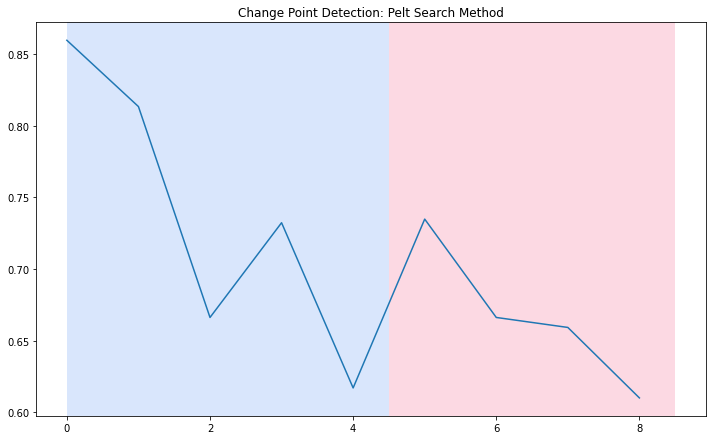

In [314]:
# Visualizing Change

import matplotlib.pyplot as plt
import ruptures as rpt

model="rbf"
algo = rpt.Pelt(model=model).fit(np.array(pearson[712])) # 'status'
result = algo.predict(pen=0.1)
rpt.display(np.array(pearson[712]), result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

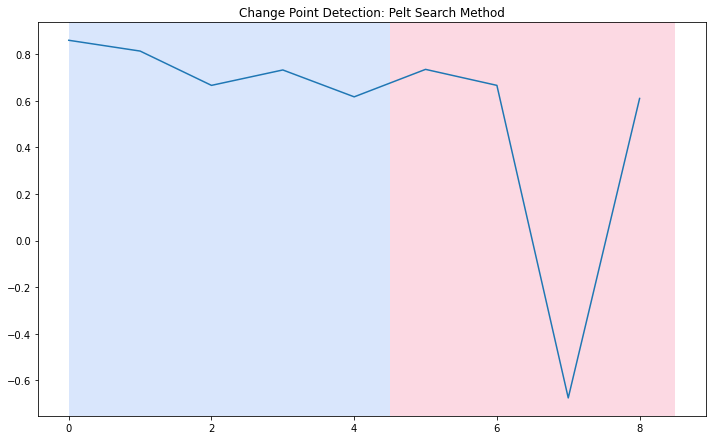

In [315]:
algo = rpt.Pelt(model=model).fit(np.array(pearson[713])) # 'procedure'
result = algo.predict(pen=0.1)
rpt.display(np.array(pearson[713]), result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

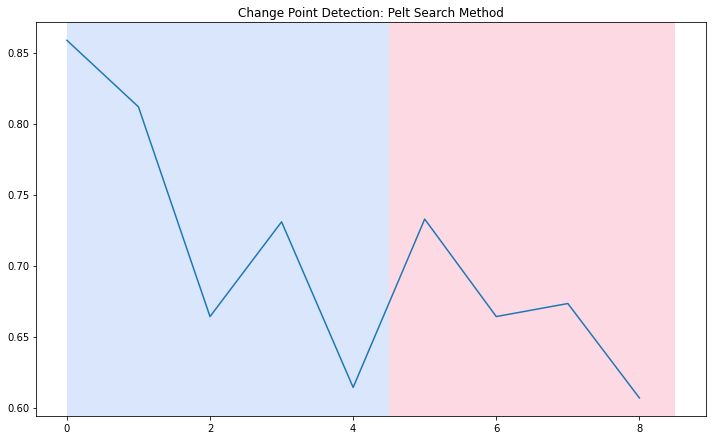

In [316]:
algo = rpt.Pelt(model=model).fit(np.array(pearson[714])) # 'exception'
result = algo.predict(pen=0.1)
rpt.display(np.array(pearson[714]), result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

In [289]:
# Accuracy scores

# Method 1
lst_orig_most_change = 0
lst_shuffle_most_change = 0
acc_most_change = 0
lst_orig_least_change = ['associations', 'engineering', 'societies', 'majority', 'images', 'churches', 'ice', 'organizations', 'instances', 'evolution', 'votes', 'study', 'forms', 'ends', 'positions', 'types', 'independence', 'aspects', 'failure']
lst_shuffle_least_change = ['accordance', 'probability', 'states', 'radius', 'indiana', 'design', 'counsel', 'doctor', 'estimates', 'star', 'author', 'leg', 'research', 'emphasis', 'defense', 'market', 'subject', 'hour', 'direction'] 
lst_intersection = [value for value in lst_orig_least_change if value not in lst_shuffle_least_change]

print("Method 1 test accuracies: most change: ", acc_most_change, "% and least change: ", len(lst_intersection)*5, "%")

# Method 2
lst_orig_most_change = ['time', 'man', 'years', 'part', 'way', 'life', 'people', 'work', 'world', 'states', 'state', 'day', 'united', 'men', 'number', 'case', 'fact', 'use', 'york']
lst_shuffle_most_change = ['time', 'man', 'years', 'part', 'way', 'life', 'people', 'work', 'world', 'states', 'state', 'day', 'united', 'men', 'number', 'case', 'fact', 'use', 'york']
lst_intersection_most_change = [value for value in lst_orig_most_change if value not in lst_shuffle_most_change]
lst_orig_least_change = ['associations', 'engineering', 'societies', 'majority', 'images', 'churches', 'ice', 'organizations', 'instances', 'evolution', 'votes', 'study', 'forms', 'ends', 'positions', 'types', 'independence', 'aspects', 'failure']
lst_shuffle_least_change = ['person', 'purpose', 'future', 'character', 'journal', 'interests', 'test', 'species', 'activities', 'failure', 'republic', 'steps', 'oxford', 'kinds', 'concern', 'collection', 'planning', 'virtue', 'pieces']
lst_intersection_least_change = [value for value in lst_orig_least_change if value not in lst_shuffle_least_change]

print("Method 2 test accuracies: most change: ", len(lst_intersection_most_change)*5, "% and least change: ", len(lst_intersection_least_change)*5, "%")

# Method 3
lst_orig_most_change = ['status', 'procedure', 'exception', 'representatives', 'kinds', 'police', 'speed', 'angle', 'executive', 'banks', 'ones', 'doctrine', 'welfare', 'n', 'car', 'spain', 'thomas', 'winter', 'edition']
lst_shuffle_most_change = ['improvement', 'june', 'jews', 'medium', 'presence', 'india', 'food', 'motion', 'division', 'animals', 'distance', 'conference', 'paper', 'defendant', 'ii', 'friends', 'building', 'christ', 'hill']
lst_intersection_most_change = [value for value in lst_orig_most_change if value not in lst_shuffle_most_change]
lst_orig_least_change = ['mexico', 'walls', 'consent', 'plane', 'centre', 'sciences', 'arm', 'indians', 'fields', 'psychology', 'liberty', 'arts', 'distinction', 'museum', 'hospital', 'skin', 'height', 'chamber', 'reduction']
lst_shuffle_least_change = ['capital', 'sentence', 'chief', 'dollars', 'executive', 'figure', 'circle', 'economy', 'division', 'base', 'nation', 'agent', 'spain', 'energy', 'principle', 'food', 'element', 'velocity', 'failure']
lst_intersection_least_change = [value for value in lst_orig_least_change if value not in lst_shuffle_least_change]

print("Method 3 test accuracies: most change: ", len(lst_intersection_most_change)*5, "% and least change: ", len(lst_intersection_least_change)*5, "%")

Method 1 test accuracies: most change:  0 % and least change:  95 %
Method 2 test accuracies: most change:  0 % and least change:  90 %
Method 3 test accuracies: most change:  95 % and least change:  95 %
